<a href="https://colab.research.google.com/github/YagyanshB/nhs-data-science/blob/main/pca_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries

import numpy as np
import pandas as pd
import os

In [ ]:
# uploading the dataset from kaggle

import kagglehub

# downloading latest version
path = kagglehub.dataset_download("kukuroo3/body-performance-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/body-performance-data


In [ ]:
print(os.listdir(path))

['bodyPerformance.csv']


In [ ]:
df = pd.read_csv(f"{path}/bodyPerformance.csv")

In [ ]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
df.shape

(13393, 12)

In [ ]:
df.drop(columns = ["gender", "class"], inplace = True)
df.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


# Data Normalization:
The process of reducing the mean of the data to 0 and the standard deviation to 1. These two steps will be carried out for each feature (column) in the data.

In [ ]:
def data_normalization(scaled_data):
  for col in scaled_data.columns: #iterating over each column
        scaled_data[col] = (scaled_data[col]-scaled_data[col].mean())/scaled_data[col].std() #data normalisation process
  return scaled_data

In [ ]:
scaled_data = data_normalization(df)
scaled_data.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.717405,0.443856,0.652126,-0.267357,0.112005,-0.015959,1.688127,0.377303,1.416909,0.673983
1,-0.864187,-0.422450,-0.974698,-1.039042,-0.167272,-0.287810,-0.053071,0.128979,0.926599,0.974977
2,-0.423841,1.310163,0.883094,-0.432718,1.229112,1.479221,0.737527,-0.379495,0.646422,-0.228996
3,-0.350450,0.704935,0.305672,-0.666979,-0.260364,1.139407,0.417523,-0.001096,0.926599,0.724149
4,-0.644014,0.621865,0.021146,-0.846121,-0.818918,-0.219847,0.615172,1.406076,0.366245,0.673983


In [ ]:
def covariance_calculation(mean_subtracted):
    #calcualte covariance amongst scaled values
    for col in mean_subtracted.columns:
        mean_subtracted[col] = mean_subtracted[col]-mean_subtracted[col].mean()

    return np.dot(mean_subtracted.T,mean_subtracted)/(len(mean_subtracted) - 1)

cov_calc = covariance_calculation(scaled_data) #calling the above function

In [ ]:
from numpy.linalg import eig
w,v=eig(cov_calc)

Text(0.5, 0, 'Magnitude of the eigenvalue')

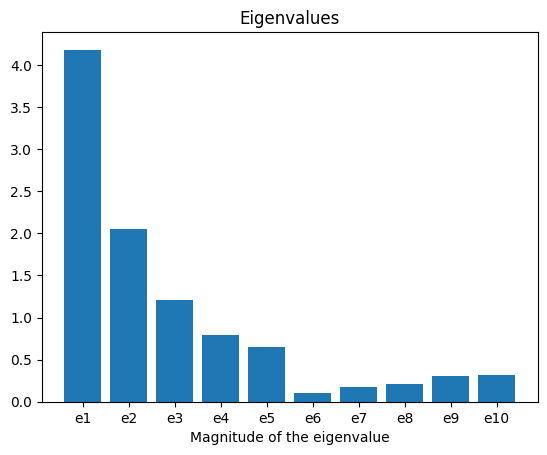

In [ ]:
import matplotlib.pyplot as plt
plt.bar(["e" + str(i+1) for i in range(len(w))], w)
plt.title("Eigenvalues")
plt.xlabel("Magnitude of the eigenvalue")

In [ ]:
useful_pc = v[:,:5] #keeping only the first 5 eigenvectors
principle_data = np.dot(df.values, useful_pc)#dot product of the two terms

principle_data = pd.DataFrame(principle_data, columns = ["PC" + str(i+1) for i in range(5)])
print(principle_data)
print("Shape of the New data is:", principle_data.shape)

            PC1       PC2       PC3       PC4       PC5
0      2.198712 -0.464296  0.258091 -0.356262 -0.526926
1      0.707742 -1.549366  0.749827  0.017977  1.089455
2      1.903221  1.529665  0.329089 -0.532368  0.342167
3      1.678017  0.014424  0.394224  0.049005  0.238469
4      1.200543 -1.438080  0.605738  0.295586 -0.812626
...         ...       ...       ...       ...       ...
13388  1.076891 -0.506767  0.316459 -0.190629  0.263114
13389  1.013589 -0.756371 -1.263205  0.030798  1.880000
13390  2.558034  0.364103 -0.379914  0.702471 -1.066046
13391 -5.798898  1.190172 -1.293666  0.479230 -0.562059
13392  0.358002  0.655451  0.371166 -0.175387  1.338097

[13393 rows x 5 columns]
Shape of the New data is: (13393, 5)


In [ ]:
scaler = StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
X_scaled = scaler.fit_transform(df)
X_scaled

array([[-0.71743212,  0.44387298,  0.65215002, ...,  0.37731734,
         1.41696147,  0.67400862],
       [-0.8642197 , -0.42246548, -0.97473438, ...,  0.12898358,
         0.92663372,  0.97501314],
       [-0.42385695,  1.31021144,  0.88312744, ..., -0.37950936,
         0.64644644, -0.22900492],
       ...,
       [ 0.16329338,  1.02538783,  1.09234611, ...,  0.14080899,
         0.36625915,  0.97501314],
       [ 1.99813815, -2.66545136, -0.81572819, ..., -0.71062104,
        -2.7858478 , -2.88787813],
       [-0.20367558, -0.54114198, -0.11275345, ..., -0.9589548 ,
         0.78654008, -0.25408863]])

In [ ]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca

array([[ 2.19879402, -0.46431287,  0.25810034, -0.35627571,  0.52694585],
       [ 0.70776841, -1.54942419,  0.7498552 ,  0.01797774, -1.08949549],
       [ 1.90329221,  1.52972219,  0.32910101, -0.53238834, -0.34217978],
       ...,
       [ 2.55812975,  0.36411672, -0.37992797,  0.70249738,  1.0660859 ],
       [-5.79911487,  1.19021614, -1.29371469,  0.47924822,  0.56207981],
       [ 0.35801504,  0.65547523,  0.37117997, -0.17539312, -1.33814721]])

In [ ]:
print(f"Data shape after PCA: {X_pca.shape}")

Data shape after PCA: (13393, 5)


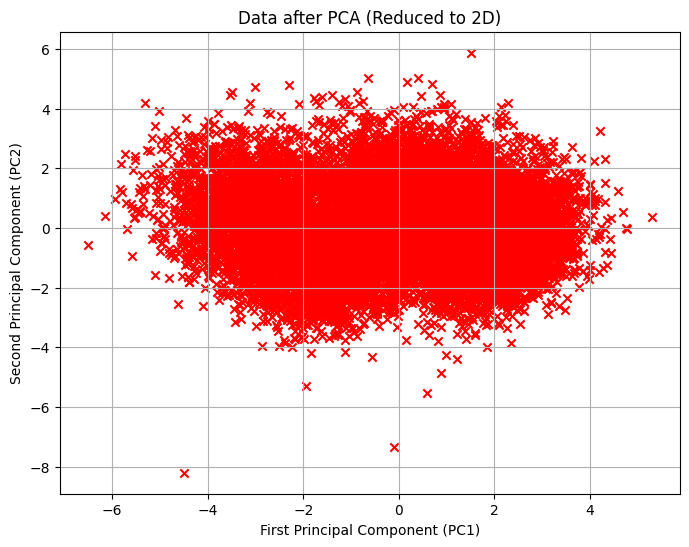

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='r', marker='x')
plt.title("Data after PCA (Reduced to 2D)")
plt.xlabel("First Principal Component (PC1)")
plt.ylabel("Second Principal Component (PC2)")
plt.grid(True)
plt.show()

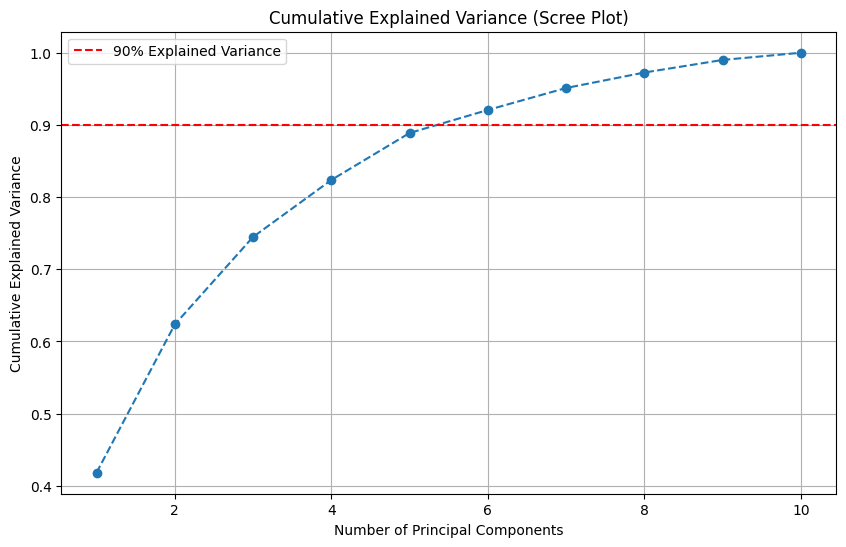

In [ ]:
# --- Step 3: Scree Plot to Choose Number of Components ---
# Apply PCA without specifying n_components to see the variance explained by all components.
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance (Scree Plot)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.legend()
plt.grid(True)
plt.show()